## Loading all the libraries needed

In [303]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

After loading the libraries we need for the analysis, we load the file that we need. In this case it is the 'dailyActivities_merged.csv'.

## Loading All the Files Needed 

In [273]:
Activity = pd.read_csv(r'C:/Users/safam/OneDrive/Desktop/fitbit data/dailyActivity_merged.csv')

In [274]:
weight = pd.read_csv(r'C:/Users/safam/OneDrive/Desktop/fitbit data/weightLogInfo_merged.csv')

In [275]:
Steps_Daily = pd.read_csv(r'C:/Users/safam/OneDrive/Desktop/fitbit data/dailySteps_merged.csv')

In [276]:
Sleep = pd.read_csv(r'C:/Users/safam/OneDrive/Desktop/fitbit data/sleepDay_merged.csv')

To check if the file has loaded properly, we use the following code:

In [277]:
Activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [278]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [279]:
Steps_Daily.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [280]:
Sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


## Cleaning the Files

To consolidate the date columns across all the files, we will split the day column in the 'Sleep' dataframe into two:

In [281]:
# we now confirm the total number of participants in the study:

Activity['Id'].nunique()

33

In [282]:
Steps_Daily['Id'].nunique()

33

In [283]:
Sleep['Id'].nunique()

24

In [284]:
weight['Id'].nunique()

8

There are 33 participants of this study which is confirmed by the above command.

In [285]:
#we now check for null values in each column.If nulls exist, we will drop the empty rows. 
Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [286]:
Steps_Daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [287]:
Sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [288]:
print(Activity.duplicated().sum())
print(Steps_Daily.duplicated().sum())
print(Sleep.duplicated().sum())
print(weight.duplicated().sum())

0
0
3
0


In [289]:
sleep = Sleep.drop_duplicates()
print(sleep.duplicated().sum())

0


Since there seem to be no null values and duplicated rows, we can continue with our analyses. 

## Manipulating the Data at Hand:

First, we calculate total minutes asleep each night and then calculate total hours asleep each night. Then we calculate the mean hours each user slept:

In [290]:
sleeptime = sleep.drop(['TotalSleepRecords','TotalTimeInBed'],axis=1)
sleeptime[['HoursAsleep']] = sleep[['TotalMinutesAsleep']].div(60,axis=0)
sleeptime = sleeptime.groupby(['Id']).mean(numeric_only=True)
sleeptime.head()

,TotalMinutesAsleep,HoursAsleep
Id,,
1503960366,360.280000,6.004667
1644430081,294.000000,4.900000
1844505072,652.000000,10.866667
1927972279,417.000000,6.950000
2026352035,506.178571,8.436310


We now calculate the average steps each user took during the course of the data collection:

In [291]:
StepDaily = Steps_Daily
Steps_Daily = Steps_Daily.groupby(['Id']).mean(numeric_only=True)
Steps_Daily.head()

,StepTotal
Id,
1503960366,12116.741935
1624580081,5743.903226
1644430081,7282.966667
1844505072,2580.064516
1927972279,916.129032


We will now categorize the participants based on the number of steps they take in a day. 

Accoding to https://www.medicinenet.com/how_many_steps_a_day_is_considered_active/article.htm, we can categorise a into various activity levels based on the number of steps they take: 

*Sedentary: Less than 5,000 steps daily
*Low active: About 5,000 to 7,499 steps daily
*Somewhat active: About 7,500 to 9,999 steps daily
*Active: More than 10,000 steps daily
*Highly active: More than 12,500 steps daily

For the purpose of this analysis, we will club 'Active and Highly active' categories into 'Very Active' if the total number of steps taken is greater than 10,000. 



In [292]:
#Creating a new list called 'UserType' which is then added to the existing 'Steps_Daily' as another column 'UserType'
UserType = []
step = Steps_Daily['StepTotal'].tolist()
for val in step:
    if val <5000:
        UserType.append('Sedentary')
    elif (val >= 5000 and val<7500):
        UserType.append('Lightly Active')
    elif (val >=7500 and val<10000):
        UserType.append('Fairly Active')
    elif val >=10000:
        UserType.append('Very Active')

Steps_Daily['UserType'] = UserType

#To check if another column is added we use the head() function:
Steps_Daily.head()

,StepTotal,UserType
Id,,
1503960366,12116.741935,Very Active
1624580081,5743.903226,Lightly Active
1644430081,7282.966667,Lightly Active
1844505072,2580.064516,Sedentary
1927972279,916.129032,Sedentary


We will now arbitrarily categorize each user into high, moderate, or low usage of the app based on how many days they used the device during the data collection.
Low: Less than 20 days
Moderate: Between 20 and 30 days
High:Greater than 30 days

In [293]:
#Creating a new table titled 'usage' which has a column 'ActiveDays' listing the number of days each user was active. 
Usage = Activity[['Id','ActivityDate']]
Usage = Usage.groupby('Id').size()
Usage= Usage.to_frame()
Usage = Usage.rename(columns= {0: 'ActiveDays'})

#Now we will categorise the rate of usage of each user:
#Creating a new list called 'UserType' which is then added to the existing 'Steps_Daily' as another column 'UserType'
Active = []
use = Usage['ActiveDays'].tolist()
for val in use:
    if val <20:
        Active.append('Low')
    elif (val >= 20 and val<30):
        Active.append('Moderate')
    elif (val >=30):
        Active.append('High')
Usage['UseType'] = Active

#To check if another column is added we use the head() function:
Usage.head()

,ActiveDays,UseType
Id,,
1503960366,31,High
1624580081,31,High
1644430081,30,High
1844505072,31,High
1927972279,31,High


Additionally, we calculate the total hours the user had their device on their person by adding their active minutes into:
    
    -Less than 12 hours
    
    -Between 12 and 24 hours
    
    -All day

We then append this information to the 'Activity' table

In [294]:
Activity['TotalHours'] = round((time_worn['VeryActiveMinutes']+time_worn['FairlyActiveMinutes']+time_worn['LightlyActiveMinutes']+time_worn['SedentaryMinutes'])/60,2)

Hours = []
hour = Activity['TotalHours'].tolist()
for val in hour:
    if val <12:
        Hours.append('Less than 12 Hours')
    elif (val >= 12 and val<24):
        Hours.append('Between 12 and 24 Hours')
    elif (val ==24):
        Hours.append('All day')
Activity['HourlyUsage'] = Hours
Activity.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalHours,HourlyUsage
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,18.23,Between 12 and 24 Hours
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,17.22,Between 12 and 24 Hours
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,24.00,All day
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,16.63,Between 12 and 24 Hours
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,17.33,Between 12 and 24 Hours


We create a new table 'percent' which is further broken down into 3 tables 'High', 'Mod', 'Low'. We do this to categorise High, Moderate and Low daily users based on how many hours each user-type uses the app/device.

In [295]:
time = Activity[['Id','TotalHours','HourlyUsage' ]]
percent = Usage.merge(time, on = 'Id')

In [296]:
High.DataFrame = percent[percent['ActiveDays'] >= 30]
Mod.DataFrame = percent[percent['UseType'] == 'Moderate']
Low.DataFrame = percent[percent['ActiveDays'] < 20]

## Vizualising the Data to Gain Insights and to Draw Conclusions

1. Distribution of each user based on their Activity
2. Distribution of sleep patterns of each user

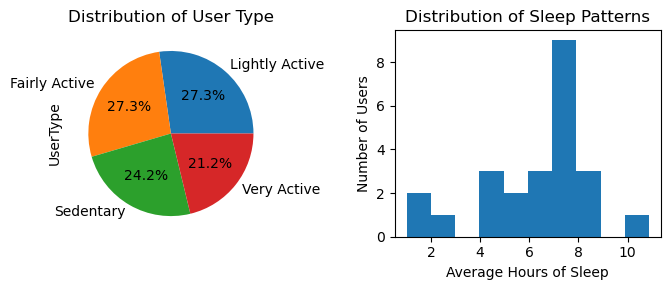

In [297]:
#distribution of users as usertype
plt.subplot(1,2,1)
Steps_Daily['UserType'].value_counts().plot(kind='pie',autopct='%1.1f%%',title= 'Distribution of User Type' ,figsize=(7,3))

#distribution of users based on their average sleep
plt.subplot(1,2,2)
sleeptime['HoursAsleep'].plot(kind = 'hist', title ='Distribution of Sleep Patterns', figsize = (7,3))
plt.ylabel('Number of Users')
plt.xlabel('Average Hours of Sleep')

plt.tight_layout()
plt.show()


3. Distribution of BMI across Activity

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


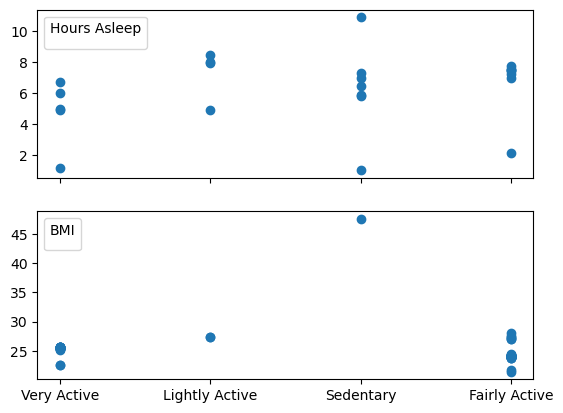

In [298]:
#Checking to see if average sleep has any affect on the which category the user falls into
#To do this we first merge sleeptime and Steps_Daily data frames
sleep_steps = sleeptime.merge(Steps_Daily, on = 'Id')
activity_weight = pd.merge(weight, Steps_Daily, on='Id', how='left')


fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.scatter(y= sleep_steps['HoursAsleep'], x=sleep_steps['UserType'])
legend1 = ax1.legend(loc="upper left", title="Hours Asleep")
ax2.scatter(y= activity_weight['BMI'], x=activity_weight['UserType'])
legend2 = ax2.legend(loc="upper left", title="BMI")
plt.show()

Although there is limited data which can heavily skew the results, we can see a trend that very active and fairly active users (so users who walk greater than 7500 steps per day on average) are the people most likely to have a healthy BMI( which falls between 18.5-24.9). Only about 24% of the users logged their weight, which is not enough to make any concrete conclusions. 

4. Linear Regression to Establish Correlations:

To establish any correlation that might exist, we will conduct a linear regression, to see if sleep time had any affect on the steps taken.

In [299]:
X = sleep_steps['StepTotal'].values.reshape(-1, 1)  
Y = sleep_steps['HoursAsleep'].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

This result shows that there is close to zero correlation between hours slept and steps walked.

We will also check the correlation between calories burnt and total steps walked. 

In [300]:
X1 = Activity['TotalSteps'].values.reshape(-1, 1)  
Y1 = Activity['Calories'].values.reshape(-1, 1)
linear_regressor2 = LinearRegression()  # create object for the class
linear_regressor2.fit(X1, Y1)  # perform linear regression
Y1_pred = linear_regressor2.predict(X1)  # make predictions

value of R-squared: 0.0483 .
This means that number of steps walked is  4.83 % dependent on hours slept.


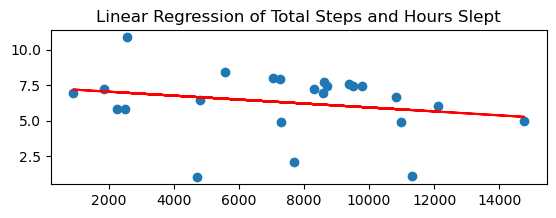

value of R-squared: 0.35 . 
This means that number of steps walked is  35.0 % dependent on hours slept.


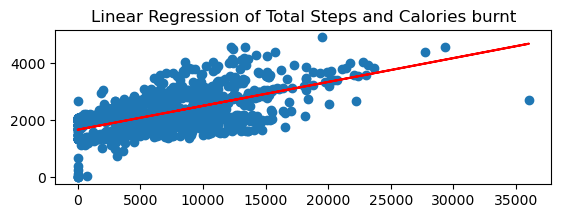

In [301]:
plt.figure().set_figheight(2)
r_squared = linear_regressor.score(X, Y)
print('value of R-squared:',round(r_squared,4), '.\nThis means that number of steps walked is ', round(r_squared*100, 2),'% dependent on hours slept.')
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title('Linear Regression of Total Steps and Hours Slept')
plt.show()

plt.figure().set_figheight(2)
r_squared2 = linear_regressor2.score(X1, Y1)
print('value of R-squared:',round(r_squared2,4), '. \nThis means that number of steps walked is ', round(r_squared2*100, 2),'% dependent on hours slept.')
plt.scatter(X1, Y1)
plt.plot(X1, Y1_pred, color='red')
plt.title('Linear Regression of Total Steps and Calories burnt')
plt.show()


5. Distribution of Total Usage and Usage per day

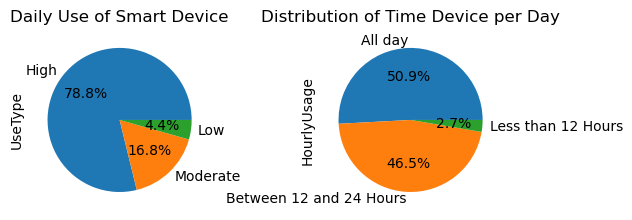

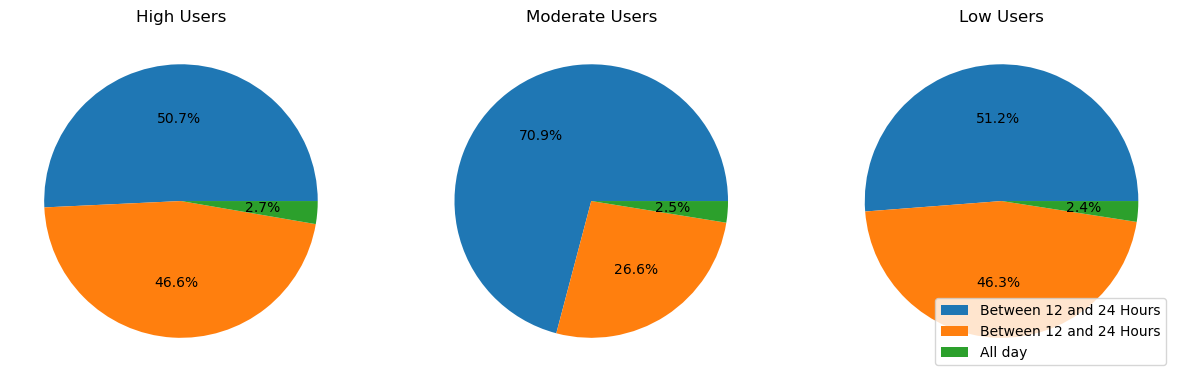

In [302]:
#Plotting the all the data that we have manipulated:
plt.subplot(1,2,1)
percent['UseType'].value_counts().plot(kind='pie',autopct='%1.1f%%',title= 'Daily Use of Smart Device')

plt.subplot(1,2,2)
percent['HourlyUsage'].value_counts().plot(kind ='pie',autopct='%1.1f%%',title= 'Distribution of Time Device per Day')

plt.tight_layout()
plt.show()

#Plotting a distribution of usage per day based on the type of user they are:
fig, axes = plt.subplots(1, 3, figsize=(15,8))

ax1=axes[0].pie(High['HourlyUsage'].value_counts(),autopct='%1.1f%%')
axes[0].set_title('High Users')
ax2=axes[1].pie(Mod['HourlyUsage'].value_counts(), autopct='%1.1f%%')
axes[1].set_title('Moderate Users')
ax3=axes[2].pie(Low['HourlyUsage'].value_counts(),autopct='%1.1f%%')
axes[2].set_title('Low Users')
plt.legend(High['HourlyUsage'], loc='best')
#plt.title('Distribution of Users Based on How Much Time Users Wear Their Device')
plt.show()

## Conclusions and Recommendation to Stakeholders is presented in a different presentation file.